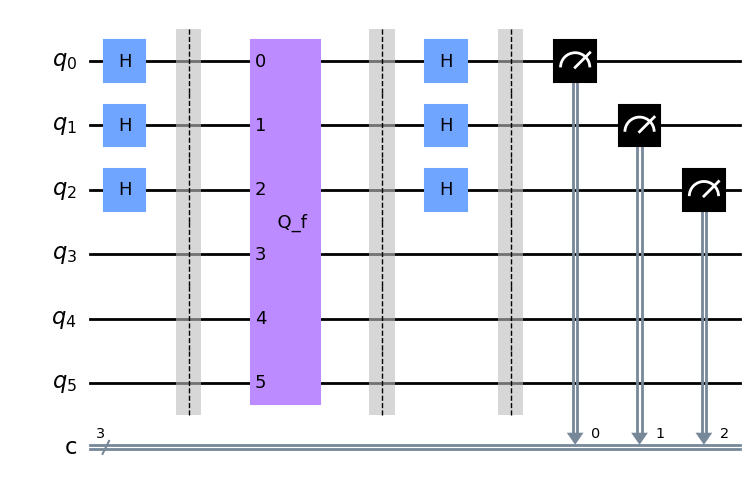

In [1]:

from qiskit import IBMQ, Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

# Función que implementa el Algoritmo de Simon
def simon_algorithm(b):
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # Añadimos puertas de Hadamard a los primeros n qubits
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # Añadimos el oráculo de Simon correspondiente a la cadena b
    simon_circuit.append(simon_oracle(b).to_gate(label = '  Q_f  '),list(range(2*n)))
    # simon_circuit.compose(simon_oracle(b),inplace=True) # para observar la estructura del oráculo
    simon_circuit.barrier()
    
    # De nuevo, añadimos puertas de Hadamard a los primeros n qubits
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # Realizamos mediciones sobre los estados de los n primeros qubits
    simon_circuit.measure(range(n), range(n))
    
    return simon_circuit

simon_algorithm('001').draw(output = 'mpl')    


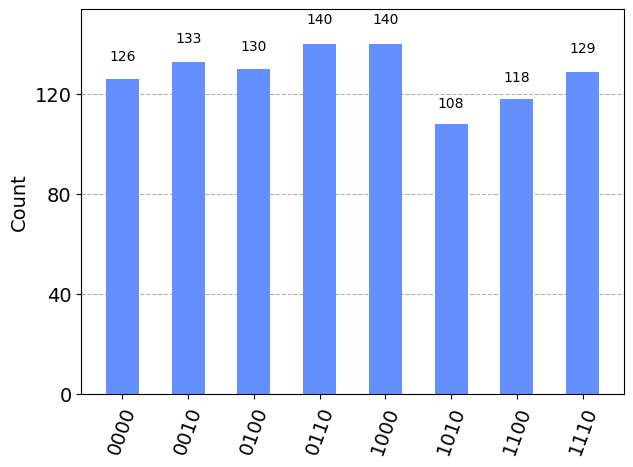

In [2]:

# Valor de la cadena de bits b que caracteriza el oráculo
b = '0001'

# Simulación del Algoritmo de Simon con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = simon_algorithm(b)
transpiled_algorithm = transpile(algorithm, aer_sim)
results = aer_sim.run(transpiled_algorithm).result()
counts = results.get_counts()
plot_histogram(counts)


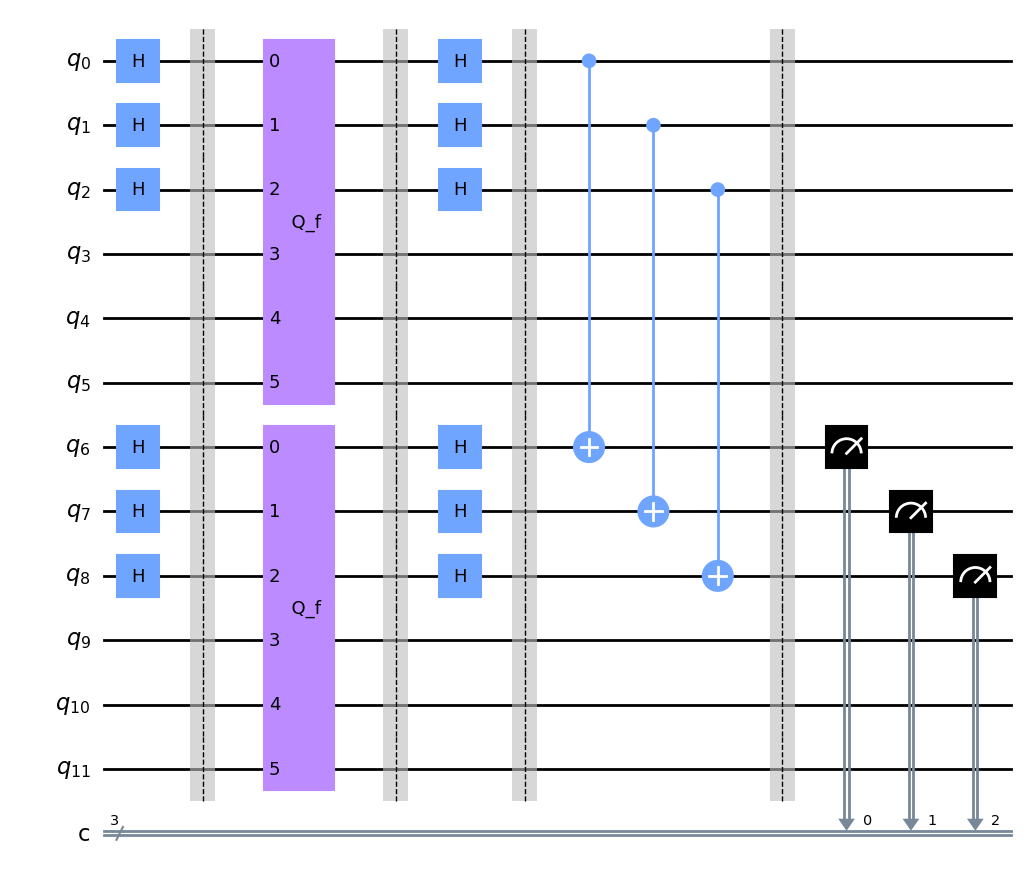

In [3]:

"""

Primera Regla Metamórfica del algoritmo de Simon:

- Al efectuar la suma bit a bit con los posibles resultados del programa 
   que resuelve el algoritmo de Simon, obtenemos de nuevo el conjunto inicial.

"""

def simon_rule(b):
    n = len(b)
        
    simon_circuit = QuantumCircuit(4*n, n)

    # Añadimos puertas de Hadamard a los qubits correspondientes
    simon_circuit.h(range(n))   
    simon_circuit.h(range(2*n, 3*n))
    simon_circuit.barrier()
    
    # Añadimos los oráculos correspondiente a la cadena b
    simon_circuit.append(simon_oracle(b).to_gate(label='  Q_f  '), list(range(2*n)))
    simon_circuit.append(simon_oracle(b).to_gate(label='  Q_f  '), list(range(2*n,4*n)))
    simon_circuit.barrier()
    
    # De nuevo, añadimos puertas de Hadamard a los qubits del principio
    simon_circuit.h(range(n))   
    simon_circuit.h(range(2*n, 3*n))
    simon_circuit.barrier()
    
    # Añadimos las puertas necesarias para la suma bit a bit
    for i in range(n):
        simon_circuit.cx(i, 2*n + i)
    simon_circuit.barrier()
    
    # Realizamos mediciones de los qubits que guardan la suma bit a bit
    simon_circuit.measure(range(2*n,3*n), range(n))

    return simon_circuit

simon_rule('001').draw(output = 'mpl')   


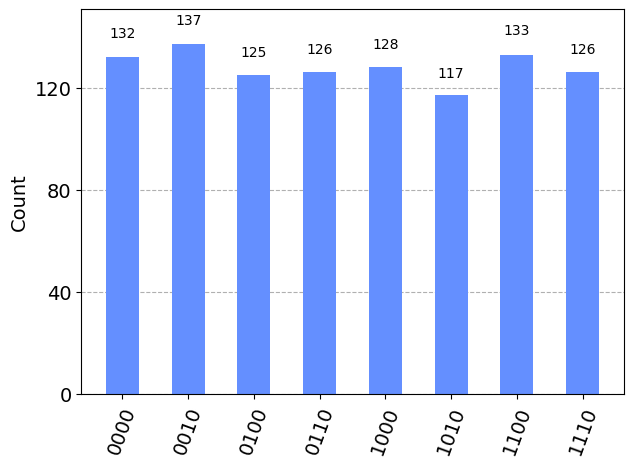

In [4]:

# Valor de la cadena de bits b que caracteriza el oráculo
b = '0001'

# Simulación de la primera regla metamórfica con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = simon_rule(b)
transpiled_algorithm = transpile(algorithm, aer_sim)
results = aer_sim.run(transpiled_algorithm).result()
counts = results.get_counts()
plot_histogram(counts)


In [5]:

"""

Segunda Regla metamórfica del algoritmo de Simon:
- Aplicar la implementación del algoritmo a una cadena e invertir las cadenas
   de bits resultantes, equivale a aplicar el programa a la cadena inicial invertida.

"""

# Función para invertir el orden de una cadena de caracteres
def reverse_str(word: str) -> str:
    return word[::-1]

# Función para invertir el orden de una lista de cadenas
def reverse_lst(words: [str]) -> [str]:
    return list(map(reverse_str,words))

# Valor de la cadena de bits b que tomará el circuito inicial
a = '0001'
b = reverse_str(a)

aer_sim = Aer.get_backend('qasm_simulator')
# Procedemos con el simulador local, como hicimos anteriormente
algorithm = simon_algorithm(a) # cadena invertida
transpiled_algorithm = transpile(algorithm, aer_sim)
results = aer_sim.run(transpiled_algorithm).result()
counts = results.get_counts()
print(sorted(set(counts.keys())))

# Simulador local aplicado al algoritmo inicial con la cadena b
algorithm = simon_algorithm(b)
transpiled_algorithm = transpile(algorithm,aer_sim) 
results = aer_sim.run(transpiled_algorithm).result()
counts = results.get_counts()
print(sorted(reverse_lst(set(counts.keys())))) # invertimos las cadenas


['0000', '0010', '0100', '0110', '1000', '1010', '1100', '1110']
['0000', '0010', '0100', '0110', '1000', '1010', '1100', '1110']


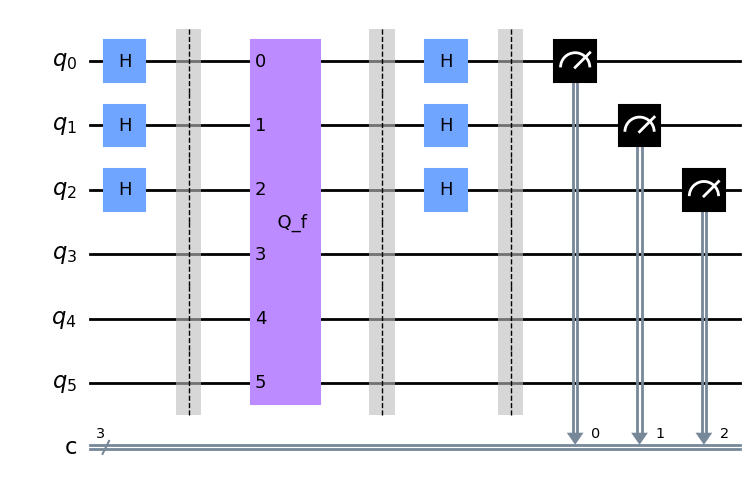

In [6]:

# Alternativamente, creamos un circuito cuántico para la cadena invertida

# Función que implementa el Algoritmo de Simon para la cadena invertida b
def simon_algorithm_inverted(b):
    b = reverse_str(b)
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # Añadimos puertas de Hadamard a los primeros n qubits
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # Añadimos el oráculo de Simon correspondiente a la cadena b
    simon_circuit.append(simon_oracle(b).to_gate(label = '  Q_f  '),list(range(2*n)))
    # simon_circuit.compose(simon_oracle(b), inplace = True) # se puede utilizar para observar los cambios internos
    simon_circuit.barrier()
    
    # De nuevo, añadimos puertas de Hadamard a los primeros n qubits
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # Realizamos mediciones sobre los estados de los n primeros qubits
    simon_circuit.measure(range(n), range(n))
    
    return simon_circuit

simon_algorithm_inverted('001').draw(output = 'mpl')   


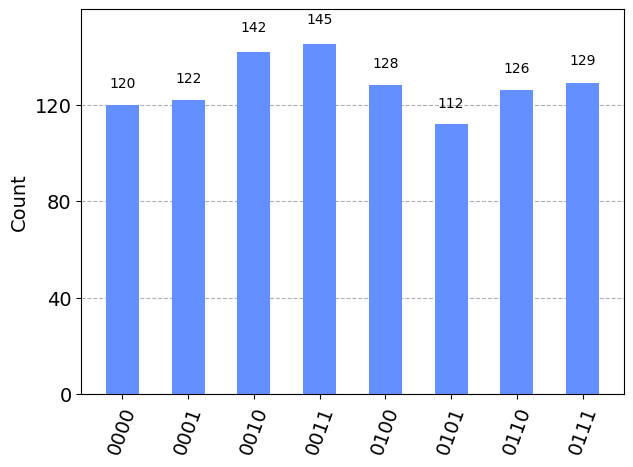

In [7]:

# Valor de la cadena de bits b que caracteriza el oráculo
b = '0001'

# Simulación del circuito cuántico anterior con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = simon_algorithm_inverted(b)
transpiled_algorithm = transpile(algorithm, aer_sim)
results = aer_sim.run(transpiled_algorithm).result()
counts = results.get_counts()
plot_histogram(counts)


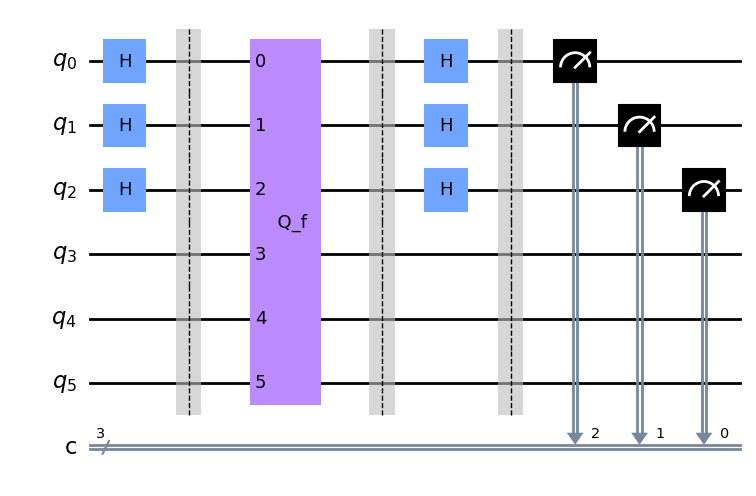

In [8]:

# Función para obtener los resultados inversos de los observados mediante el Algoritmo de Simon
def inverted_simon_algorithm(b):
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # Añadimos puertas de Hadamard a los primeros n qubits
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # Añadimos el oráculo de Simon correspondiente a la cadena b
    simon_circuit.append(simon_oracle(b).to_gate(label = '  Q_f  '), list(range(2*n)))
    # simon_circuit.compose(simon_oracle(b), inplace = True)
    simon_circuit.barrier()
    
    # De nuevo, añadimos puertas de Hadamard a los primeros n qubits
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # Realizamos las mediciones pero invirtiendo el orden de los bits que guardan los resultados
    simon_circuit.measure(range(n), range(n-1,-1,-1))
    
    return simon_circuit

simon_algorithm_inverted('001').draw(output = 'mpl') 

inverted_simon_algorithm('001').draw(output = 'mpl')  


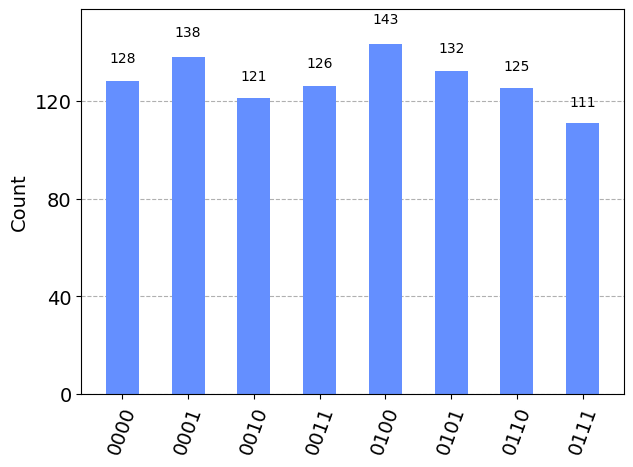

In [9]:

# Valor de la cadena de bits b que caracteriza el oráculo
b = '0001'

# Simulación del Algoritmo de Simon con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = inverted_simon_algorithm(b)
transpiled_algorithm = transpile(algorithm, aer_sim)
results = aer_sim.run(transpiled_algorithm).result()
counts = results.get_counts()
plot_histogram(counts)


In [10]:

# Vamos a ejecutar los circuitos de la regla anterior desde un dispositivo cuántico real de IBM
from qiskit_ibm_provider import IBMProvider

# Conectar con la cuenta de IBM Quantum Experience, el token introducido varía según la cuenta
provider = IBMProvider("890236cc4ae6dbd9f97b87a81e905dd319c9ba3dad5e6e48fc06bf6bb08277dda38313cf01aefade795376ec3065e948a412ca8f579cdb3949cbd530b70d967b")


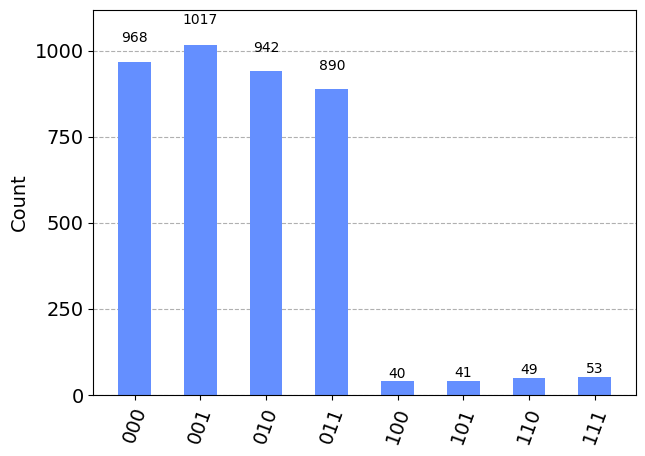

In [11]:

# Valor de la cadena de bits b que caracteriza el oráculo
b = '001'

# Obtener el backend de IBM Quantum
backend = provider.get_backend('ibm_lagos')  # Reemplaza 'ibmq_...' con el nombre del backend real que deseas utilizar

algorithm = simon_algorithm_inverted(b)
transpiled_algorithm = transpile(algorithm, backend)
backend.run(transpiled_algorithm)

###
results = backend.run(transpiled_algorithm).result()
counts = results.get_counts()
plot_histogram(counts)


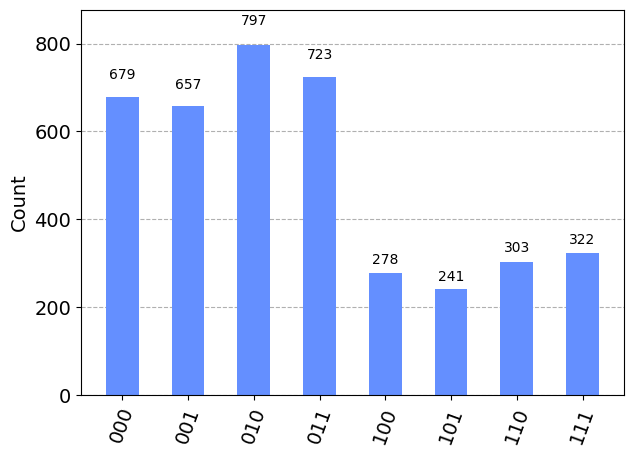

In [12]:

# Valor de la cadena de bits b que caracteriza el oráculo
b = '001'

# Obtener el backend de IBM Quantum
backend = provider.get_backend('ibm_lagos')  # Reemplaza 'ibmq_...' con el nombre del backend real que deseas utilizar

algorithm = inverted_simon_algorithm(b)
transpiled_algorithm = transpile(algorithm, backend)
backend.run(transpiled_algorithm)

###
results = backend.run(transpiled_algorithm).result()
counts = results.get_counts()
plot_histogram(counts)
